# **PROJECT**

## Spam Email Classification

### The Spambase dataset is taken from the UC Irvine Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Spambase

### Step 1: Importing necessary libraries and dataset 

In [355]:
# Firstly we require these basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
data_path="C:\\Users\\lavan\\OneDrive\\Desktop\\spambase\\spambase.data"
data=pd.read_csv(data_path, sep=',', header=None)
#data.rename(columns={57:'is_spam'},inplace=True)

In [232]:
data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


#### **Now, let's explore our data**

In [235]:
data.shape

(4601, 58)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [239]:
data.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57],
      dtype='int64')

In [241]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Step 2: Data Preprocessing

#### **Checking for missing values**

In [245]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

In [247]:
data.isnull().sum().sum()

0

##### *Clearly, there are no missing values.*

#### From spambase.txt we know that column names are such that:

In [251]:
# column names
col_name=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

In [252]:
# Now let's quickly try to analyze our data with the help of reassigned column names
data=pd.read_csv(data_path, sep=',', header=None, names=col_name)

#### Step 3: Data Visualization

##### **Let's plot a countplot to know how many e-mails are spam or ham(non-spam)**

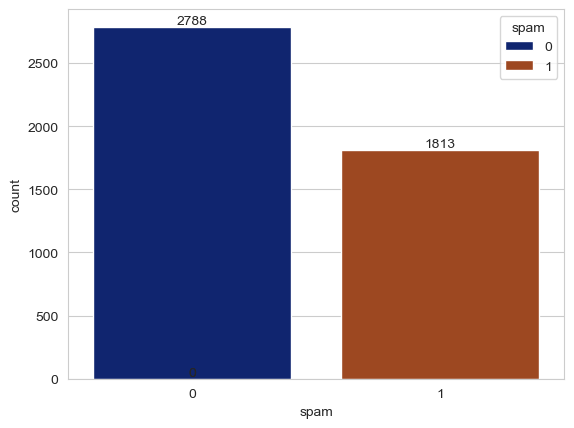

In [255]:
sns.set_style('whitegrid')
ax= sns.countplot(x='spam', hue='spam', data=data, palette='dark')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            int(p.get_height()), 
            ha='center', va='bottom')

plt.show()

#### Step 4: Outlier detection and Outlier Removal
##### Because, this will help in improving model accuracy, preventing misleading insights, and ensure clean, reliable data for analysis.

In [257]:
data_copy=data.copy()
# Copying data so that dataset does not get hampered!

<Axes: ylabel='capital_run_length_total'>

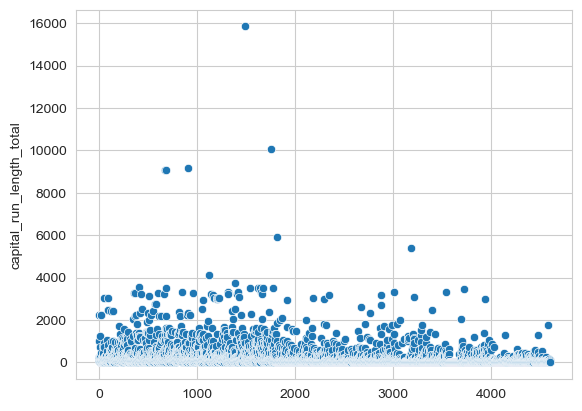

In [258]:
sns.scatterplot(data=data['capital_run_length_total'])

In [259]:
# By Visualizing the Scatter Plot we can set the Value Boundaries to remove the outliers.
# For capital_run_length_total we can set the upper boundary to 4000:
data=data[(data.capital_run_length_total < 4000)]

<Axes: ylabel='capital_run_length_average'>

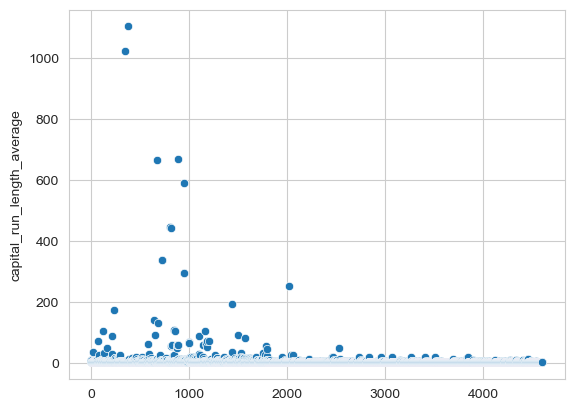

In [260]:
sns.scatterplot(data = data['capital_run_length_average'])

In [261]:
# Outlier Detection by Visualizing the Scatter Plot for 'capital_run_length_average'
# For capital_run_length_total we can set the upper boundary to 200:
data=data[(data.capital_run_length_average < 200)]

<Axes: ylabel='capital_run_length_longest'>

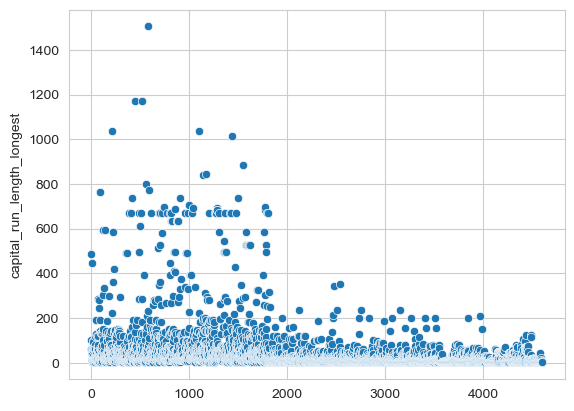

In [262]:
sns.scatterplot(data = data['capital_run_length_longest'])

In [265]:
# Outlier Detection by Visualizing the Scatter Plot for 'capital_run_length_longest'
# For capital_run_length_total we can set the upper boundary to 2000:
data=data[(data.capital_run_length_longest < 2000)]

In [266]:
data.shape

(4581, 58)

##### *Around 20 outliers are removed*

#### Step 5: Exploratory Data Analysis(EDA)

In [270]:
# Finding the Correlation of each features so that we can drop one of the two features which are highly correlated.
correlation= data.corr()

In [271]:
# Printing those columns which has correlation more than 70%
relation = ~(correlation.mask(np.eye(len(correlation), dtype=bool)).abs() > 0.7).any()
relation

word_freq_make                 True
word_freq_address              True
word_freq_all                  True
word_freq_3d                   True
word_freq_our                  True
word_freq_over                 True
word_freq_remove               True
word_freq_internet             True
word_freq_order                True
word_freq_mail                 True
word_freq_receive              True
word_freq_will                 True
word_freq_people               True
word_freq_report               True
word_freq_addresses            True
word_freq_free                 True
word_freq_business             True
word_freq_email                True
word_freq_you                  True
word_freq_credit               True
word_freq_your                 True
word_freq_font                 True
word_freq_000                  True
word_freq_money                True
word_freq_hp                   True
word_freq_hpl                  True
word_freq_george               True
word_freq_650               

In [272]:
# After comparing the correlation between features we are removing one of two features that have a correlation higher than 0.7
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] > 0.7:
            if columns[j]:
                columns[j] = False
final_columns = data.columns[columns]
data = data[final_columns]

In [274]:
data.shape

(4581, 54)

##### Some features are removed such as:

In [276]:
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_data', 'word_freq_85', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_

##### CLearly, these following columns are removed from original dataset:
 1. "word_freq_857"
 2.  "word_freq_415"
 3.   "word_freq_technology"
 4.   "word_freq_direct".

#### Step 6: Feature Engineering

##### **Data Transformation**

In [282]:
# Applying *Quantile Transformation* to the columns "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total" because the values of these columns were not in the range of 0-1 as others.
col_names = ['capital_run_length_average', 'capital_run_length_longest','capital_run_length_total']
features = data[col_names]

In [283]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

In [284]:
data[col_names] = scaler.fit_transform(features.values)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,0.757516,0.833333,0.759949,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,0.858859,0.904011,0.937938,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,0.961152,0.979897,0.985577,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,0.732517,0.739239,0.689690,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,0.732517,0.739239,0.689690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,0.098599,0.115616,0.480981,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,0.241241,0.157658,0.129129,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,0.180828,0.248749,0.561562,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,0.100411,0.208208,0.444444,0


#### **Feature Selection**

In [286]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [287]:
# Splitting the columns into Training Columns
training_col=data.columns.tolist()[0:53]

def select_features(x_train, y_train):
    best_feature = SelectKBest(score_func=mutual_info_regression, k='all')
    best_feature.fit(x_train, y_train)
    return best_feature

In [290]:
# Selecting the best features used for classifying them as 'Spam'
features= select_features(data[training_col], data['spam'])

In [291]:
print(features)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000201256A3F60>)


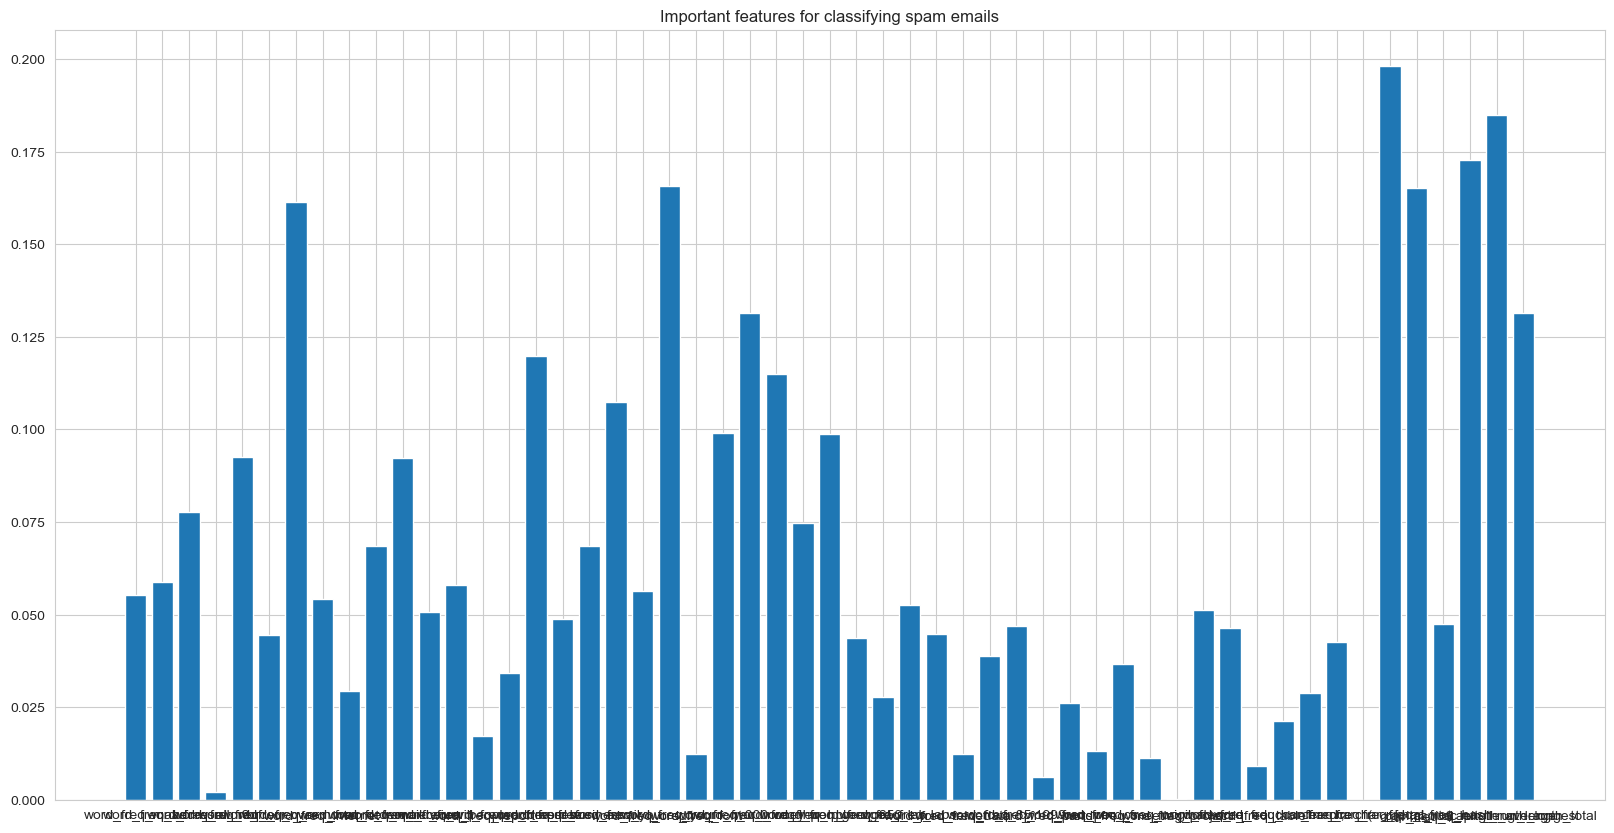

In [292]:
plt.figure(figsize=(20, 10))
plt.bar([i for i in training_col], features.scores_)
plt.title("Important features for classifying spam emails")
plt.show()

### NOTE: **I will attach clear picture of this in repository.**

#### Step 7: Model Selection 

In [308]:
# Splitting the dataset into dependent and independent variables
x= pd.DataFrame(data, columns=data.drop(['spam'],axis=1).columns)
y= data['spam']

In [309]:
# This block will calculate **accuracy** of a model
def getscore(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test,y_test)

In [310]:
# Using K-fold Cross validation to split the data into training and testing data using 5 folds

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True)

### **We choose *Random Forest Classifier* for our data**

In [312]:
from sklearn.ensemble import RandomForestClassifier   

In [313]:
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=20, min_samples_split=2, random_state=2)

# Array for storing the score of Random Forest Classifier model of 5 folds
Random_forest=[] 

# For storing sll the result per fold
Foldresult=[] 

# For storing the accuracy per fold
Accuracy=[]      

# For storing the error per fold
Error=[]        

In [314]:
from sklearn.metrics import confusion_matrix

for train,test in k_fold.split(x):
    x_train, x_test, y_train, y_test= x.iloc[train], x.iloc[test], y.iloc[train], y.iloc[test]   
    Random_forest.append(getscore(rf, x_train, x_test, y_train, y_test))
    
    rf.fit(x_train, y_train)
    spam_ham=rf.predict(x_test)
    
    # Calculating the True Positive, True Negative, False Positive and False Negative.
    CM=confusion_matrix(y_test, rf.predict(x_test))
    TN=CM[0][0]
    TP=CM[1][1]
    FN=CM[1][0]
    FP=CM[0][1]
    
    # Calculating the Accuracy and Error of Model
    accuracy = rf.score(x_test, y_test)
    Accuracy.append(accuracy)
    error = 1 - accuracy
    Error.append(error)
    
    # Appending whole result into Foldresult
    Foldresult.append({"FP":FP,"FPR":(FP/(FP+TN)),"FN":FN,"FNR":(FN/(TP+FN)),"Accuracy(%)": accuracy*100, "Error(%)": error*100})

In [315]:
output = pd.DataFrame(Foldresult)

In [316]:
print("""\t\tFINAL RESULT OF MODEL""")

from tabulate import tabulate
print(tabulate(output,headers="keys",tablefmt="fancy_grid"))

		FINAL RESULT OF MODEL
╒════╤══════╤═══════════╤══════╤═══════════╤═══════════════╤════════════╕
│    │   FP │       FPR │   FN │       FNR │   Accuracy(%) │   Error(%) │
╞════╪══════╪═══════════╪══════╪═══════════╪═══════════════╪════════════╡
│  0 │   22 │ 0.039356  │   24 │ 0.0670391 │       94.9836 │    5.01636 │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  1 │   19 │ 0.0337478 │   27 │ 0.0764873 │       94.9782 │    5.02183 │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  2 │   16 │ 0.0288809 │   27 │ 0.0745856 │       95.3057 │    4.69432 │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  3 │    8 │ 0.0144665 │   31 │ 0.0853994 │       95.7424 │    4.25764 │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  4 │   18 │ 0.0323741 │   32 │ 0.0888889 │       94.5415 │    5.45852 │
╘════╧══════╧═══════════╧══════╧═══════════╧═══════════════╧════════════╛


In [317]:
# Calculating the Average Accuracy and Error Rates

A=np.mean(Accuracy)
E=np.mean(Error)
print("Average accuracy rate:", A*100)
print("Average Error rate:", E*100)

Average accuracy rate: 95.11026558028124
Average Error rate: 4.889734419718752


#### Step 8: Model Evaluation

##### Evaluating performance of model using ROC Curve and AUC Value.


In [320]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [321]:
y_train_pred = rf.predict_proba(x_train)
a=(roc_auc_score(y_train, y_train_pred[:,1]))
a1=print('ROC-AUC Value on Training Data=', a)

y_test_pred = rf.predict_proba(x_test)
b=(roc_auc_score(y_test, y_test_pred[:,1]))
b1=print('ROC-AUC Value on Testing Data=',b)

ROC-AUC Value on Training Data= 0.999953762195221
ROC-AUC Value on Testing Data= 0.9823591127098322


In [322]:
spam_ham= rf.predict(x_test)
print(spam_ham)

[1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [325]:
from sklearn.metrics import classification_report
print(classification_report(y_test, spam_ham))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       556
           1       0.95      0.91      0.93       360

    accuracy                           0.95       916
   macro avg       0.95      0.94      0.94       916
weighted avg       0.95      0.95      0.95       916



In [327]:
# Calculating and Plotting the Confusion Matrix using True Positive, True Negative, False Positive and False Negative
CM=confusion_matrix(y_test, rf.predict(x_test))
TN=CM[0][0]
TP=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print("Confusion Matrix\n", CM)

Confusion Matrix
 [[538  18]
 [ 32 328]]


In [328]:
# Calculating the False Positive Rate(FPR), False Negative Rate(FNR), True Positive Rate(TPR) and True Negative Rate(TNR)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("False Positive Rate:",FPR)
print("False Negative Rate:",FNR)

False Positive Rate: 0.03237410071942446
False Negative Rate: 0.08888888888888889


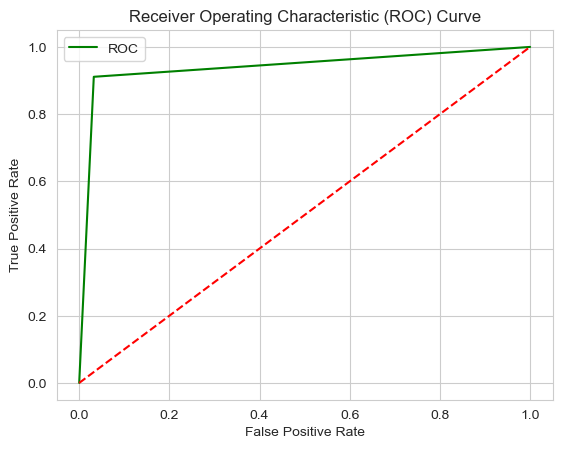

In [329]:
# Plotting the ROC Curve using FPR and TPR
FPR, TPR, THRESHOLD = roc_curve(y_test, spam_ham)
THRESHOLD

def plot_roc_curve(FPR, TPR):
    plt.plot(FPR, TPR, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(FPR,TPR)

#### ROC Curve tends more towards True Positive Rate 1.0 so it depicts that our model is performing eell in the Classification of Email as Spam or Ham.

# **SUMMARY**

### 1. **Model is 96% accurate.**
### 2. We used **Random Forest Classifier** to predict e-mail as spam or not spam.
### 3. Among **4,601 e-mails 2,788 are not spam while 1,813 are spam**.
### 4. We used **UC Irvine Machine Learning Repository** for spambase data.

### 5. Average accuracy rate is **95.11%**.
### 6. Average Error rate is **4.88%**.
### 7. ROC-AUC Value on Training Data is **0.999953762195221**.
### 8. ROC-AUC Value on Testing Data is **0.9823591127098322**.
### 9. False Positive Rate is **0.03237410071942446**.
### 10. False Negative Rate is **0.08888888888888889**.
### 11. **ROC Curve tends towards true positive rate 1.0 which depicts that this model is working fine.**